# PdVega-Beispiele

## Importe

In [1]:
import pandas as pd
import numpy as np
import pdvega

## Deklarative Beschreibung der Datenvisualisierung

Mit [Vega-Lite](http://vega.github.io/vega-lite) lässt sich deklarativ beschreiben, wie die Daten auf Visualisierungsfunktionen abgebildet werden sollen. Mit `pdvega` wird diese Spezifikation ähnlich einfach wie über die [Matplotlib-API](https://pandas.pydata.org/pandas-docs/stable/visualization.html) verfügbar: `data.plot` muss lediglich durch `data.vgplot` ersetzt werden, wobei sich `data` auf Pandas-`Series` oder `DataFrame`-Objekte bezieht.

Laden eines `DataFrame` mit Zeitreihen von Aktienkursen:

In [2]:
from vega_datasets import data
stocks = data.stocks(pivoted=True)

[Matplotlib-API](https://pandas.pydata.org/pandas-docs/stable/visualization.html):

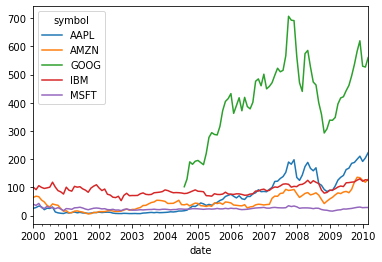

In [3]:
stocks.plot.line()

`pdvega`-API:

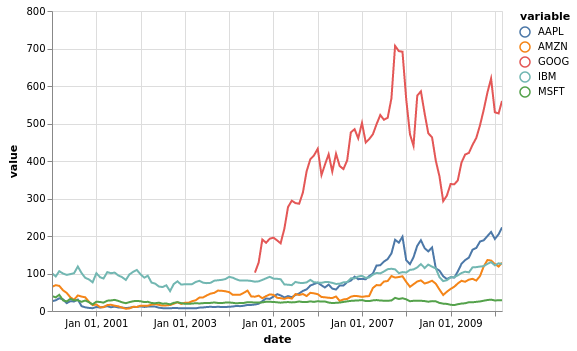

In [5]:
stocks.vgplot.line()

Das Ergebnis sind schöne Datenvisualisierungen mit einem Minimum an Boilerplate. Zudem sind die aus `pdvega` erstellten Diagramme interaktiv und lassen sich Verschieben und Vergrößern/Verkleinern.

## Einfache Datenvisualisierungen mit `data.vgplot`

Die zentrale Schnittstelle von `pdvega` ist das `vgplot`-Attribut, das Pandas-`DataFrame` und `Series`-Objekten hinzugefügt wird.

Wie bei dem Pandas Plots gibt es zwei Möglichkeiten, Diagramme zu erstellen:

1. das `vgplot`-Attribut eines Pandas-Objekts kann direkt aufgerufen werden, also z.B.

```
iris.vgplot(kind='scatter', x='sepalLength', y='petalLength', c='species')
```

2. Alternativ kann auch die spezifische Methode aufgerufen werden, die jedem Diagrammtyp zugeordnet ist:

```
iris.vgplot.scatter(x='sepalLength', y='petalLength', c='species')
```

Dieser Ansatz bietet den Vorteil, dass verfügbare Plottypen über die Tabulatorvervollständigung untersucht werden können. Die einzelnen Funktionen bieten auch eine detailliertere Dokumentation der für jede Methode verfügbaren Argumente.

### Diagrammtypen

Die `vgplot`-API stellt neun grundlegende Diagrammtypen bereit:

#### Liniendiagramme mit `vgplot.line`

Der Standarddiagrammtyp für `vgplot` ist ein Liniendiagramm.

Sofern nichts anders angegeben ist, wird der Index von `DataFrame` oder `Series` als x-Achsenvariable verwendet, und eine separate Linie für die y-Werte jeder Spalte des `DataFrame`. Wenn Sie ihr nur eine Teilmenge der Spalten plotten lassen möchtet, könnt ihr mithilfe der Pandas-Indizierung die Spalten auswählen, an denen ihr interessiert seid:

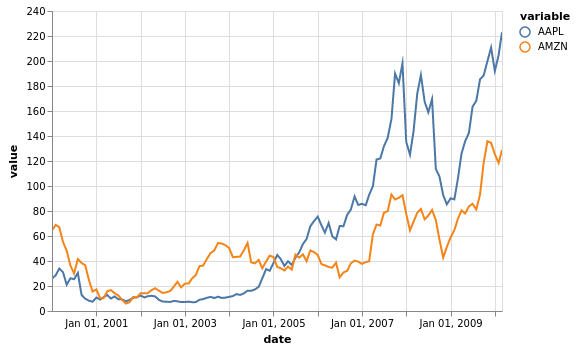

In [6]:
stocks[['AAPL', 'AMZN']].vgplot.line()

Liniendiagramme können weiter angepasst werden. Informationen hierzu findet ihr in der Dokumentation:

* [pdvega.FramePlotMethods.line()](https://altair-viz.github.io/pdvega/API.html#pdvega.FramePlotMethods.line)
* [pdvega.SeriesPlotMethods.line()](https://altair-viz.github.io/pdvega/API.html#pdvega.SeriesPlotMethods.line)

#### Streudiagramme mit `vgplot.scatter`

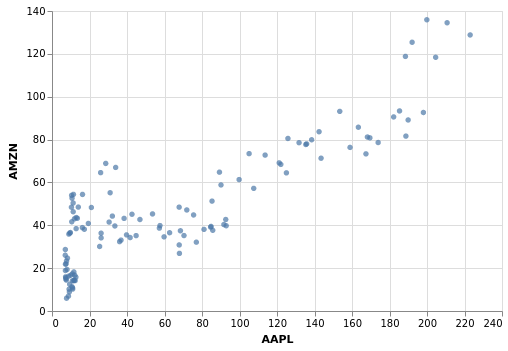

In [7]:
stocks.vgplot.scatter(x='AAPL', y='AMZN')

Um Streudiagramme weiter anzupassen, schaut euch [pdvega.FramePlotMethods.scatter()](https://altair-viz.github.io/pdvega/API.html#pdvega.FramePlotMethods.scatter) an.

#### Flächendiagramme mit `vgplot.area`

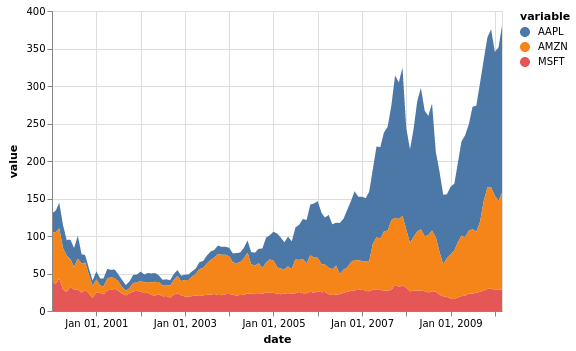

In [8]:
stocks[['MSFT', 'AAPL', 'AMZN']].vgplot.area()

Flächendiagramme können auch gestapelt werden. In diesem Fall sind transparente Flächen häufig hilfreich.

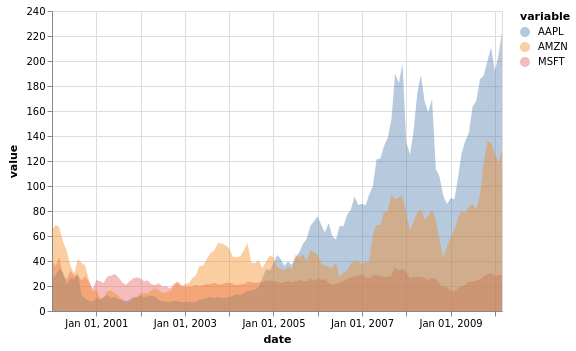

In [9]:
stocks[['MSFT', 'AAPL', 'AMZN']].vgplot.area(stacked=False, alpha=0.4)

Flächendiagramme können weiter angepasst werden, siehe

* [pdvega.FramePlotMethods.area()](https://altair-viz.github.io/pdvega/API.html#pdvega.FramePlotMethods.area)
* [pdvega.SeriesPlotMethods.area()](https://altair-viz.github.io/pdvega/API.html#pdvega.SeriesPlotMethods.area)

#### Balkendiagramme mit `vgplot.bar`

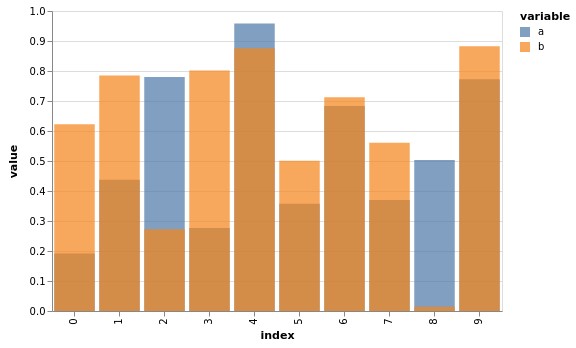

In [10]:
np.random.seed(1234)
df = pd.DataFrame(np.random.rand(10, 2), columns=['a', 'b'])

df.vgplot.bar()

Wie bei Flächendiagrammen könnt ihr mit `stacked=True` die Balken stapeln:

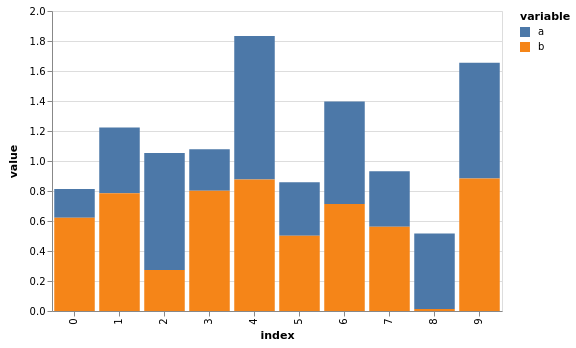

In [11]:
df.vgplot.bar(stacked=True)

Darüberhinaus können horizontale Balkendiagramme erstellt werden mit `barh`:

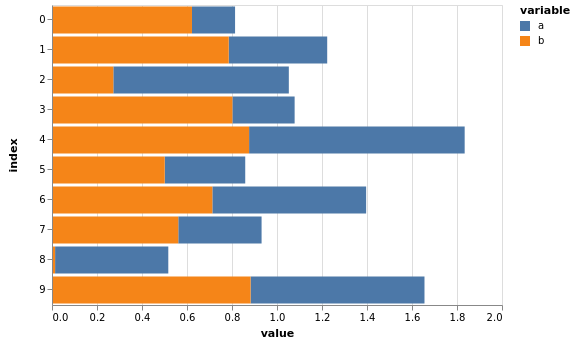

In [12]:
df.vgplot.barh(stacked=True)

#### Histogramme mit `vgplot.hist`

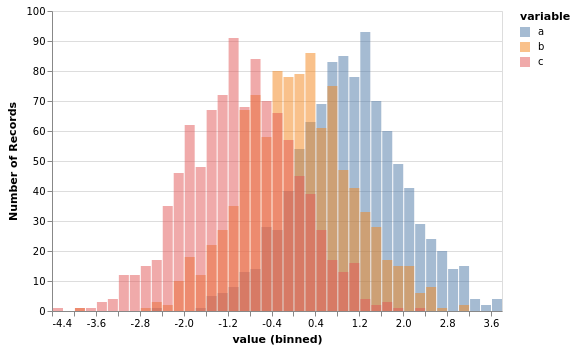

In [13]:
df = pd.DataFrame({'a': np.random.randn(1000) + 1,
                   'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1},
                  columns=['a', 'b', 'c'])

df.vgplot.hist(bins=50, alpha=0.5)

Histogramme können weiter angepasst werden, siehe

* [pdvega.FramePlotMethods.hist()](https://altair-viz.github.io/pdvega/API.html#pdvega.FramePlotMethods.hist)
* [pdvega.SeriesPlotMethods.hist()](https://altair-viz.github.io/pdvega/API.html#pdvega.SeriesPlotMethods.hist)

#### Kerndichteschätzdiagramme mit `vgplot.kde`

[Kerndichteschätzdiagramme](https://de.wikipedia.org/wiki/Kerndichtesch%C3%A4tzer) (englisch *kernel density estimation*, KDE) erzeugen ähnlich wie Histogramme glatte Kurven, die die Dichte der Messpunkte angeben. 

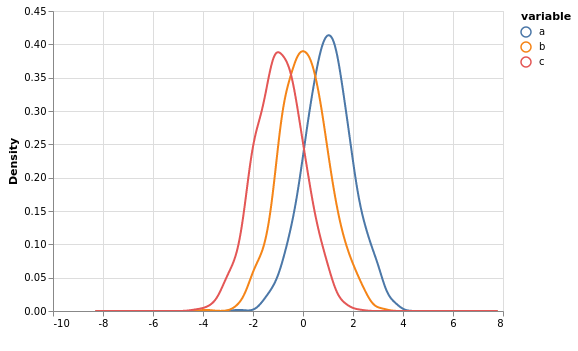

In [14]:
df.vgplot.kde()

KDE-Diagramme können weiter angepasst werden mit

* [pdvega.FramePlotMethods.kde()](https://altair-viz.github.io/pdvega/API.html#pdvega.FramePlotMethods.kde)
* [pdvega.SeriesPlotMethods.kde()](https://altair-viz.github.io/pdvega/API.html#pdvega.SeriesPlotMethods.kde)

#### Heatmaps mit `vgplot.heatmap`

Pandas-Plotting hat eine Funktion zum Erstellen einer hexagonal-gruppierten Heatmap zweidimensionaler Daten. Leider unterstützt derzeit weder Vega noch Vega-Lite diese hexagonalen Heatmaps. Sie unterstützen jedoch kartesische Heatmaps,und diese Funktionalität ist auch enthalten in `pdvega`:

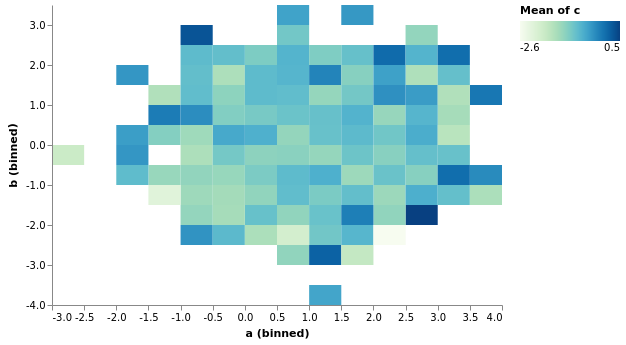

In [15]:
df.vgplot.heatmap(x='a', y='b', C='c', gridsize=20)

Heatmap-Diagramme können weiter angepasst werden, siehe [pdvega.FramePlotMethods.heatmap()](https://altair-viz.github.io/pdvega/API.html#pdvega.FramePlotMethods.heatmap).

## Statistische Visualisierung mit `pdvega.plotting`


`pdvega`unterstützt auch viele der komplexeren Plot-Routinen, die im [pandas.plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-tools)-Submodul verfügbar sind. Im Folgenden zeigen wir das Beispieleiner Multi-Panel-Streudiagramm-Matrix aus [Fisher’s Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set)-Datensatz:

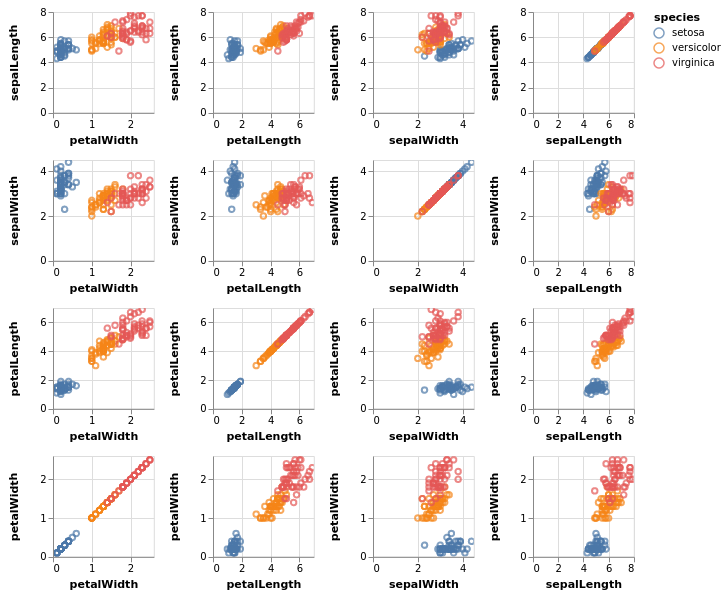

In [16]:
iris = data.iris()
pdvega.scatter_matrix(iris, 'species', figsize=(7, 7))

In diesem Diagramm könnt ihr interaktiv Verschieben und Verkleinern/Vergrößern. Mit gedrückter Umschalttaste könnt ihr auch einzelne Messpunkte auswählen. 

### Parallele Koordinaten

Eine andere Möglichkeit, mehrdimensionale Daten zu visualisieren, besteht darin, jede Dimension unabhängig voneinander mithilfe eines Diagramms mit parallelen Koordinaten zu betrachten. Dies kann mit `pdvega.parallel_coordinates()` realisiert werden, wobei die API `pandas.plotting.parallel_coordinates()` entspricht:

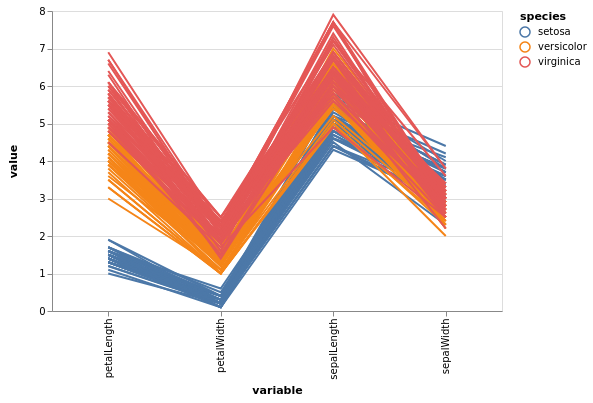

In [17]:
pdvega.parallel_coordinates(iris, "species")

Auf einen Blick könnt ihr Beziehungen zwischen Punkten erkennen und insbesondere deutlich machen, dass sich die „setosa“-Art in Breite und Länge der Blütenblätter deutlich von den beiden anderen Arten unterscheidet.

### Andrews-Kurven

Ein ähnlicher Ansatz zur Visualisierung von Datendimensionen ist als *Andrews-Kurve* bekannt: Die Idee besteht darin, aus den Merkmalen jedes Objekts eine Fourier-Reihe zu konstruieren, um die aggregierten Unterschiede zwischen Klassen qualitativ zu visualisieren. Dies kann mit der Funktion `pdvega.andrews_curves()` erfolgen, die der API von `pandas.plotting.andrews_curves()` entspricht:

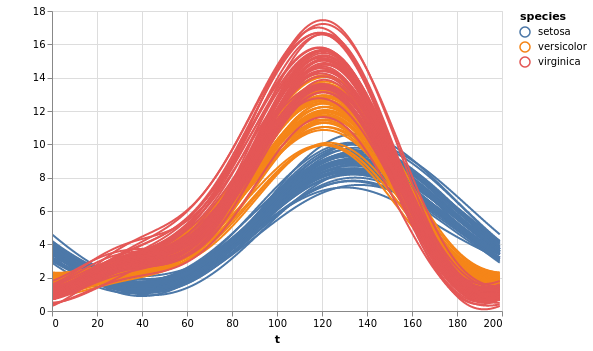

In [17]:
pdvega.andrews_curves(iris, "species")

Dies ergibt einen ähnlichen Eindruck wie in der Darstellung der parallelen Koordinaten, gibt jedoch weniger quantitative Hinweise auf die Merkmale, die zu dieser Unterscheidung führen.

### Korrelogramm (Lag-Plots)

[Korrelogramme](https://de.wikipedia.org/wiki/Korrelogramm) sind implementiert mit `pdvega.plotting.lag_plot()` wobei die API `pandas.plotting.lag_plot()` entspricht. Im Folgenden werden die Aktienkurse von Amazon und Microsoft von 1998 bis 2010 mit einer Verzögerung von 12 Monaten visualisiert:

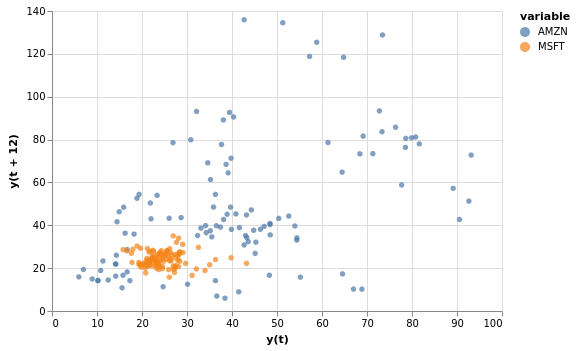

In [18]:
pdvega.lag_plot(stocks[['AMZN', 'MSFT']], lag=12)

Aus diesem Plot geht sofort hervor, dass Amazon in diesem Zeitraum weitaus volatiler war: Die Werte zeigten zu jedem Zeitpunkt nur eine sehr geringe Korrelation mit dem Wert ein Jahr später. Umgekehrt war der Wert von Microsoft in diesem Jahrzehnt sehr viel stabiler.

Wir können diese Interpretation auch im einfachen Zeitreihendiagramm des Aktienkurses jedes Unternehmens sehen:

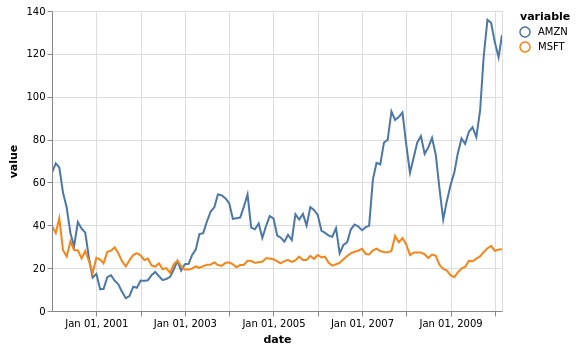

In [19]:
stocks[['AMZN', 'MSFT']].vgplot.line()

> Siehe auch:
> 
> * [Statistical Visualization with pdvega.plotting](https://altair-viz.github.io/pdvega/plotting.html#statistical-plotting)